In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Mushroom.csv')

In [3]:
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [4]:
df.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

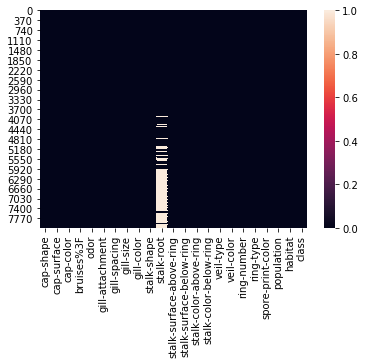

In [5]:
sns.heatmap(df.isnull())

# As there are Too many null values in stalk-root, we will drop the column

In [6]:
df.drop('stalk-root',axis=1,inplace=True)

In [7]:
df.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [10]:
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


In [11]:
plt.figure()
pd.df['class'].plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (0=edible, 1=poisonous)')

AttributeError: module 'pandas' has no attribute 'df'

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Number of poisonous/edible mushrooms (0=edible, 1=poisonous)')

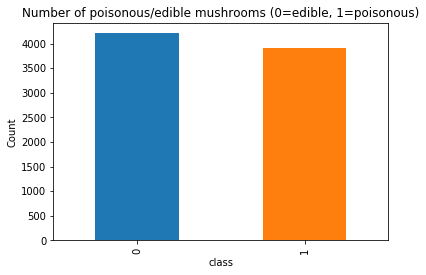

In [16]:
plt.figure()
pd.Series(df['class']).value_counts().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (0=edible, 1=poisonous)')

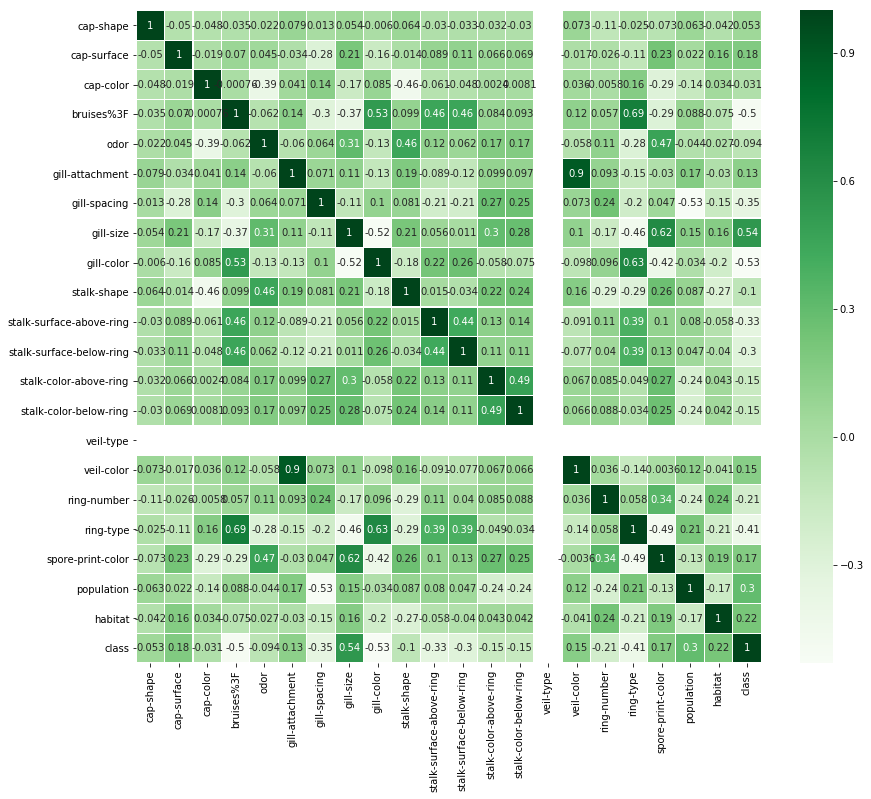

In [18]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Greens", annot=True)

In [20]:
df['veil-type'].value_counts()

0    8124
Name: veil-type, dtype: int64

# As veil-type column is having all '0' value, we will drop it

In [21]:
df.drop('veil-type',axis=1,inplace=True)

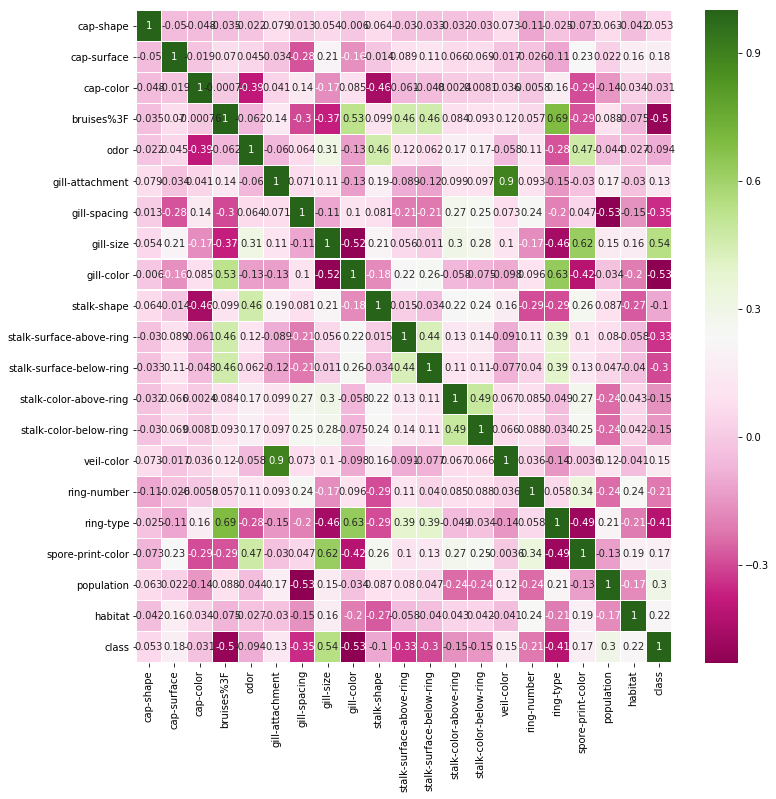

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="PiYG", annot=True)

# As columns like bruises%3F,gill-color and ring type are having very high -Ve correlation, we will remove them

In [23]:
df.drop(['bruises%3F','gill-color','ring-type'],axis=1,inplace=True)

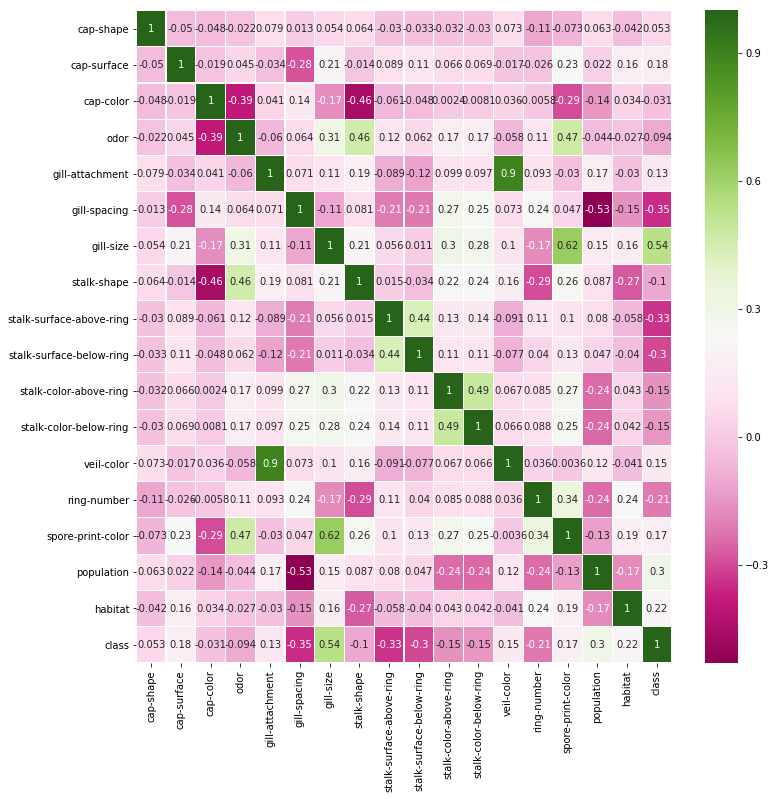

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="PiYG", annot=True)

In [43]:
x=df.drop(['class'], axis=1)
y=df['class']

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3)

In [45]:
lg=LogisticRegression()

In [46]:
lg.fit(x_train,y_train)

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
lg.score(x_train,y_train)

0.9345761519521633

In [48]:
lg.predict(x_test)

array([1, 1, 1, ..., 1, 1, 0])

In [49]:
accuracy_score(y_test,lg.predict(x_test))


0.94298605414274

In [51]:
classification_report(y_test,lg.predict(x_test))

'              precision    recall  f1-score   support\n\n           0       0.94      0.95      0.95      1262\n           1       0.95      0.93      0.94      1176\n\n   micro avg       0.94      0.94      0.94      2438\n   macro avg       0.94      0.94      0.94      2438\nweighted avg       0.94      0.94      0.94      2438\n'

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test,lg.predict(x_test))

array([[1203,   59],
       [  80, 1096]], dtype=int64)

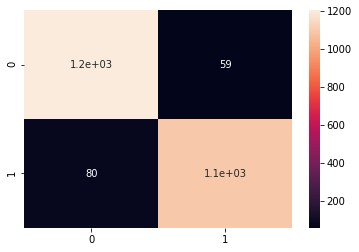

In [54]:
sns.heatmap(confusion_matrix(y_test,lg.predict(x_test)),annot=True)

# -->Therefore LogisticRegression is very well working with Mushroom Dataset with 94% accuracy.

Predicting Poisonous or edible on unknown data

In [56]:
l=np.array([5,2,6,9,0,1,2,3,4,5,6,2,2,3,2,1,0])

In [57]:
lg.predict(l)

ValueError: Expected 2D array, got 1D array instead:
array=[5 2 6 9 0 1 2 3 4 5 6 2 2 3 2 1 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [58]:
l=l.reshape(1,-1)

In [59]:
lg.predict(l)

array([1])